# Boston Housing with Linear Regression: Normalization
**With this data our objective is create a model using linear regression to predict the houses price**

The data contains the following columns:
* 'crim': per capita crime rate by town.
* 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
* 'indus': proportion of non-retail business acres per town.
* 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* 'nox': nitrogen oxides concentration (parts per 10 million).
* 'rm': average number of rooms per dwelling.
* 'age': proportion of owner-occupied units built prior to 1940.
* 'dis': weighted mean of distances to five Boston employment centres.
* 'rad': index of accessibility to radial highways.
* 'tax': full-value property-tax rate per $10,000.
* 'ptratio': pupil-teacher ratio by town
* 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* 'lstat': lower status of the population (percent).
* 'medv': median value of owner-occupied homes in $$1000s

**Let's Start**

First we need to prepare our enviroment importing some librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing DataSet and take a look at Data
BostonTrain = pd.read_csv("./data/boston_train.csv")

** Here we can look at the BostonTrain data **

In [3]:
#BostonTrain.head()
#BostonTrain.info()
BostonTrain.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

In [4]:
#ID columns does not relevant for our analysis.
BostonTrain.drop('ID', axis = 1, inplace=True)

**Define X and Y**
- X: Variables named as predictors, independent variables, features.                                                               
- Y: Variable named as response or dependent variable

In [5]:
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

## Scale train and test sets

**Import sklearn libraries:**    
- `train_test_split`, to split our data in two DF, one for build a model and other to validate
- `MinMaxScaler` to normalize the features
- `LinearRegression`, to build the model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 10)

Rescale the features in the **train set** and the **test set**:

In [8]:
cols = X.columns
scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=cols)

In [9]:
X_train_sc.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.051307,0.093785,0.396294,0.050251,0.367942,0.552820,0.691682,0.254911,0.408128,0.439780,0.688013,0.900145,0.309062
std,0.108065,0.207061,0.264394,0.219014,0.228470,0.145870,0.292169,0.206877,0.395228,0.335175,0.261111,0.223831,0.191216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001156,0.000000,0.165723,0.000000,0.179012,0.478396,0.496277,0.099987,0.130435,0.180688,0.536585,0.946078,0.159630
50%,0.005111,0.000000,0.326538,0.000000,0.314815,0.537730,0.786170,0.177899,0.173913,0.284895,0.743902,0.986802,0.284492
75%,0.065114,0.000000,0.636089,0.000000,0.539095,0.627042,0.943085,0.364728,1.000000,0.913958,0.878049,0.997495,0.429498
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_test_sc.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.037164,0.140338,0.353670,0.074627,0.333808,0.568556,0.617879,0.290733,0.326736,0.398319,0.629323,0.911735,0.280606
std,0.086332,0.277625,0.262780,0.263774,0.247482,0.145069,0.305353,0.205548,0.352282,0.313178,0.261390,0.215281,0.200064
min,0.000063,0.000000,-0.019253,0.000000,0.008230,0.166839,0.002128,0.004655,0.000000,0.009560,-0.048780,-0.000381,0.031733
25%,0.000742,0.000000,0.125802,0.000000,0.131687,0.492764,0.363298,0.118895,0.130435,0.170172,0.475610,0.949638,0.134520
50%,0.002784,0.000000,0.275953,0.000000,0.270576,0.555303,0.641489,0.261343,0.173913,0.269598,0.664634,0.989002,0.232202
75%,0.029621,0.210526,0.636089,0.000000,0.471193,0.632417,0.907979,0.426308,0.260870,0.476099,0.878049,0.999695,0.367274
max,0.521510,1.052632,1.000000,1.000000,1.000000,1.067604,1.000000,0.841066,1.000000,1.000000,1.000000,1.000000,0.911700


[What and why behind fit_transform() and transform() in scikit-learn]()

## Training with Lasso Regression Algorithm

In [11]:
lm = Lasso(alpha=0.5)
lm.fit(X_train_sc,y_train)

Lasso(alpha=0.5)

In [12]:
predictions = lm.predict(X_test_sc)

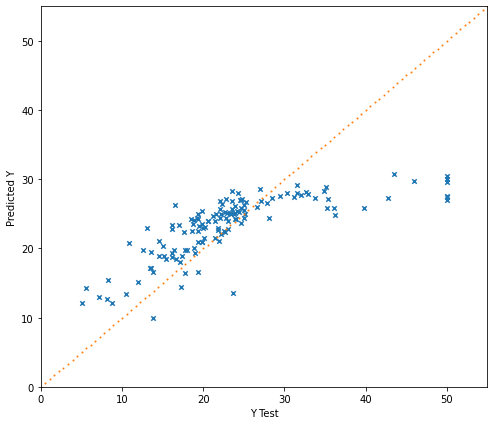

In [13]:
plt.rcParams["figure.figsize"] = (8,7)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim([0, 11*int(max(y_test)/10)])
plt.ylim([0, 11*int(max(y_test))/10])
plt.scatter(y_test,predictions,s=20,marker="x")

x = np.linspace(0, 11*int(max(y_test)/10), 2*int(max(y_test)))
plt.scatter(x, x,s=1);

In [14]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.590322348338945
MSE: 44.009295753544926
RMSE: 6.633950237493866


Considering the RMSE: we can conclude that  this model average error is RMSE at medv, which means RMSE *1000  in money

**[1] Determination coefficient**

r^2 is the proportion of the variance explained by the predictive variables (= square of Pearson coefficient)

In [15]:
lm.score(X_train_sc,y_train)

0.5157994913665325

**[2] Intercept of the fitted line**

In [16]:
lm.intercept_

31.51953616435698

**[3] Hyperplane slopes** (= linear regression coefficients):

In [17]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.000000
zn,0.000000
indus,-0.000000
chas,0.000000
nox,-0.000000
rm,0.000000
age,-0.000000
dis,-0.000000
rad,-0.000000
tax,-0.000000


How to interpret those coefficients:
    they are in function of Medv, so 
    
    - for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit
    - for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.
    

>Price prediction error is `medv*1000` because the medv is expressed in thousands of dollars